In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
df= pd.read_excel("Credit Card Customer Data.xlsx", index_col='Customer Key')

In [4]:
df.shape

(660, 6)

In [5]:
df.columns

Index(['Sl_No', 'Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made'],
      dtype='object')

In [6]:
df.sample(10)

,Sl_No,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Customer Key,,,,,,
32584,624,166000,10,0,7,0
43000,514,40000,5,3,1,4
49913,423,56000,6,3,1,0
17165,260,6000,4,4,1,4
58276,605,27000,7,3,0,2
37559,88,5000,4,1,2,5
38244,343,9000,6,4,2,3
87350,201,8000,3,0,2,9
20337,626,91000,8,1,6,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 87073 to 80150
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Avg_Credit_Limit     660 non-null    int64
 2   Total_Credit_Cards   660 non-null    int64
 3   Total_visits_bank    660 non-null    int64
 4   Total_visits_online  660 non-null    int64
 5   Total_calls_made     660 non-null    int64
dtypes: int64(6)
memory usage: 36.1 KB


In [8]:
df.isnull().sum()

Sl_No                  0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

#####  no null values

In [9]:
for col in df.columns:
    print('{:33} : {:6} : {:}'.format(col, df[col].nunique(), df[col].dtype))

Sl_No                             :    660 : int64
Avg_Credit_Limit                  :    110 : int64
Total_Credit_Cards                :     10 : int64
Total_visits_bank                 :      6 : int64
Total_visits_online               :     16 : int64
Total_calls_made                  :     11 : int64


[Text(0, 0, 'Sl_No'),
 Text(0, 0, 'Avg_Credit_Limit'),
 Text(0, 0, 'Total_Credit_Cards'),
 Text(0, 0, 'Total_visits_bank'),
 Text(0, 0, 'Total_visits_online'),
 Text(0, 0, 'Total_calls_made')]

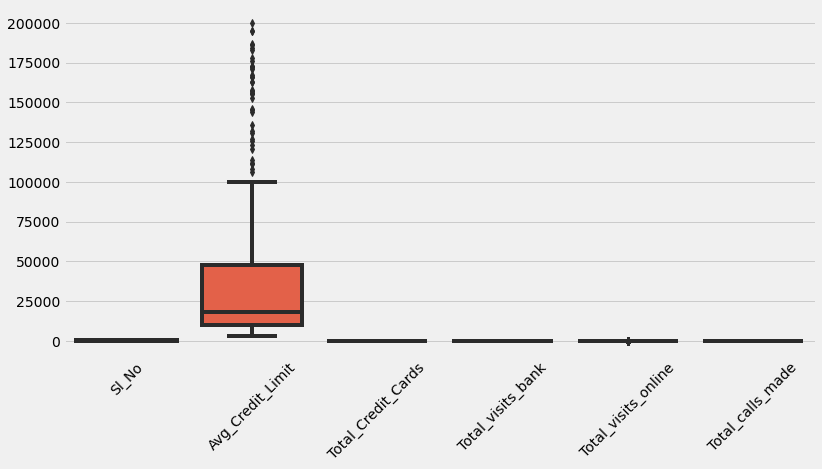

In [10]:
# box plots
plt.subplots(figsize=(12, 6))
ax = sns.boxplot(data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

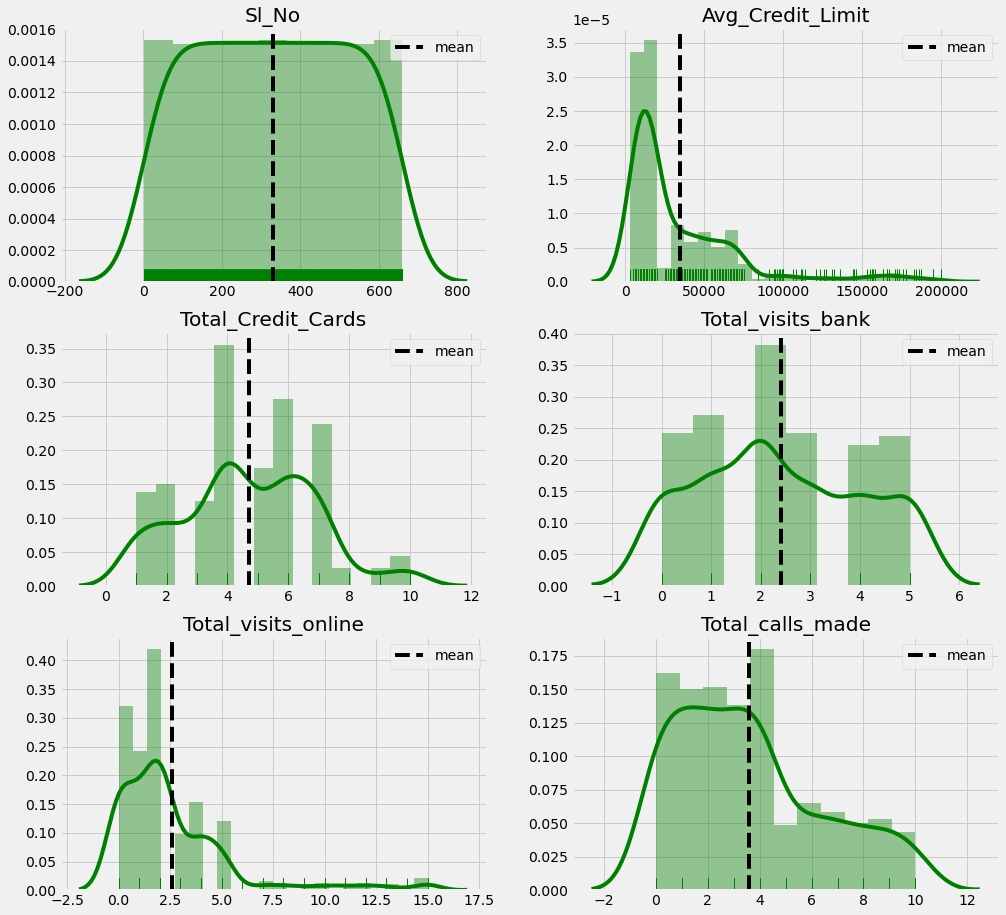

In [11]:
# dist. of single variables

import itertools

cols = [i for i in df.columns if i != 'strength']

fig = plt.figure(figsize=(15, 20))

for i,j in itertools.zip_longest(cols, range(len(cols))):
    plt.subplot(4,2,j+1)
    ax = sns.distplot(df[i],color='green',rug=True)
    plt.axvline(df[i].mean(),linestyle="dashed",label="mean", color='black')
    plt.legend()
    plt.title(i)
    plt.xlabel("")

In [12]:
# the higher the credit limit, the less the customer visits the bank

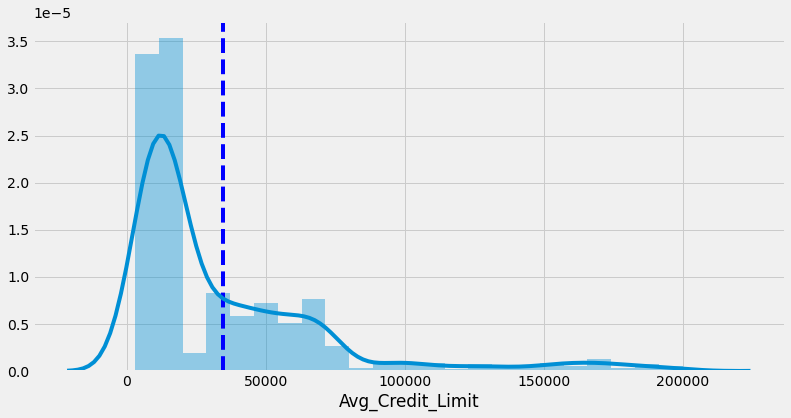

In [13]:
fig = plt.figure(figsize=(12, 6))
plt.axvline(df.Avg_Credit_Limit.mean(),linestyle="dashed",label="mean", color='blue')
sns.distplot(df.Avg_Credit_Limit);

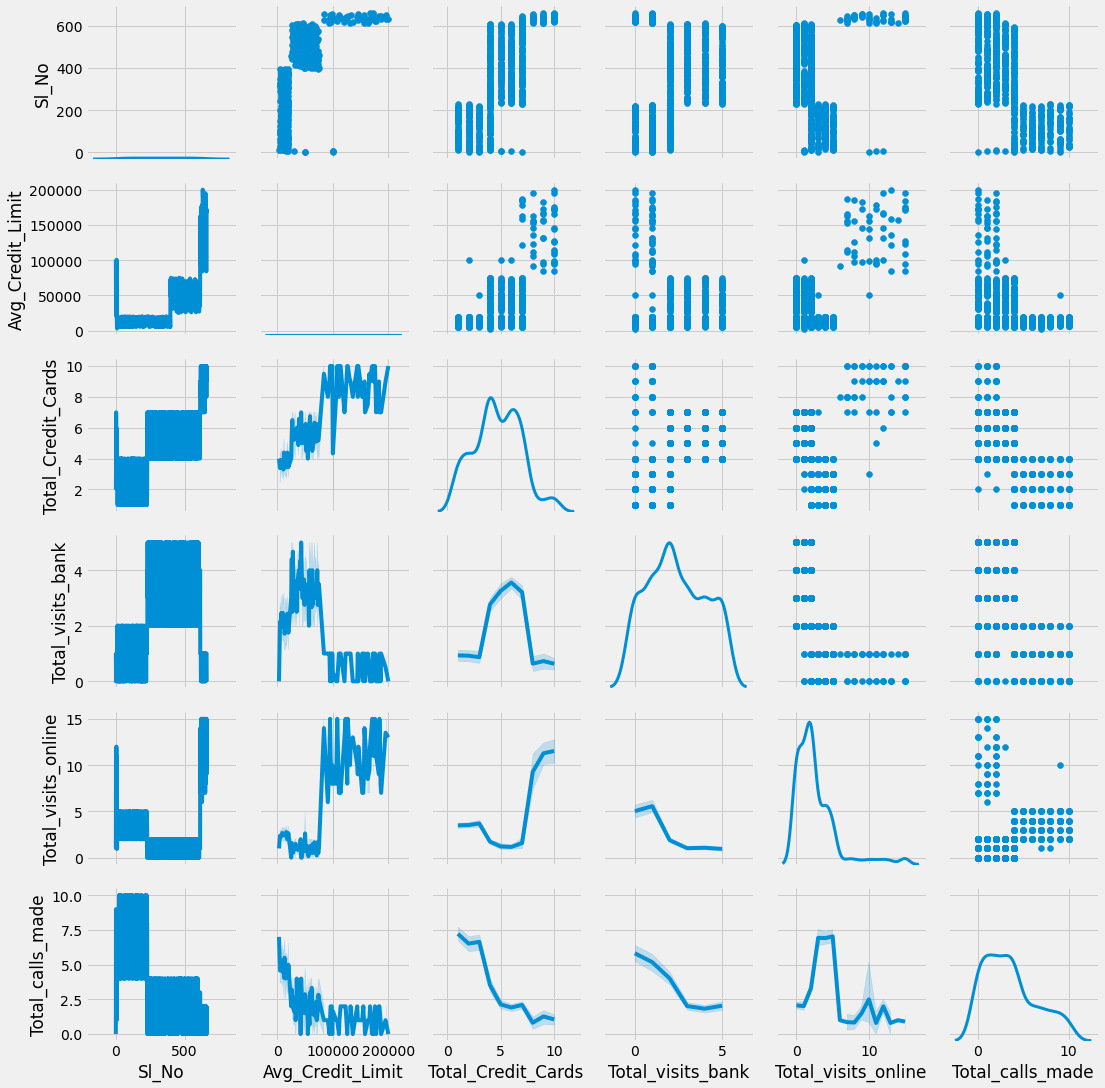

In [14]:
# pair plot

g = sns.PairGrid(df)
g.map_upper(plt.scatter)
g.map_lower(sns.lineplot)
g.map_diag(sns.kdeplot, lw=3, legend=True)


[Text(0.5, 0, 'Sl_No'),
 Text(1.5, 0, 'Avg_Credit_Limit'),
 Text(2.5, 0, 'Total_Credit_Cards'),
 Text(3.5, 0, 'Total_visits_bank'),
 Text(4.5, 0, 'Total_visits_online'),
 Text(5.5, 0, 'Total_calls_made')]

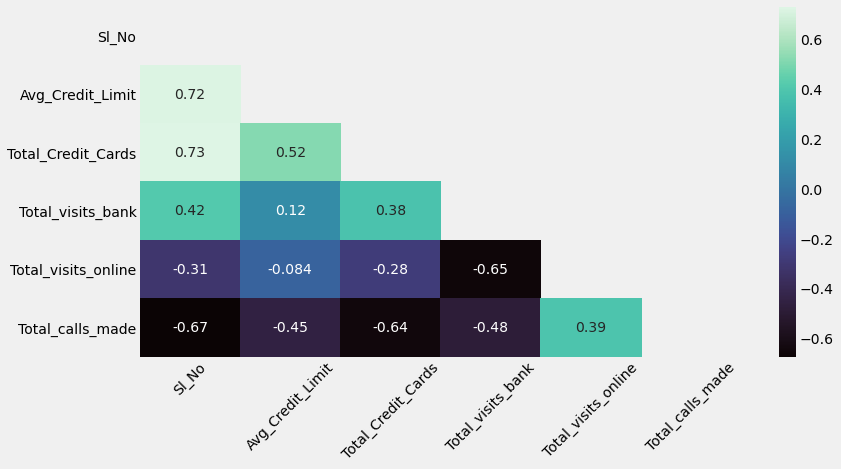

In [15]:
# heat map

plt.subplots(figsize=(12, 6))
corr = df.corr('spearman')

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(data=corr, cmap='mako', annot=True, mask=mask)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

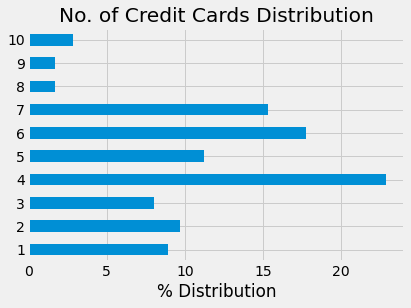

In [16]:
(1e2*df['Total_Credit_Cards'].value_counts().sort_index()/len(df)).plot(kind='barh')
plt.title('No. of Credit Cards Distribution')
plt.xlabel('% Distribution');

In [17]:
# most people have 4-7 credit cards

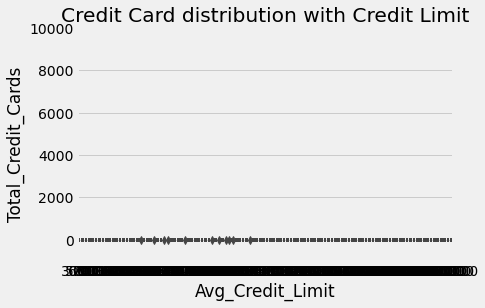

In [18]:
sns.boxplot(x="Avg_Credit_Limit", y="Total_Credit_Cards", data=df)
plt.ylim(-10**3, 10**4)
plt.title('Credit Card distribution with Credit Limit');

IndexError: index 6 is out of bounds for axis 0 with size 6

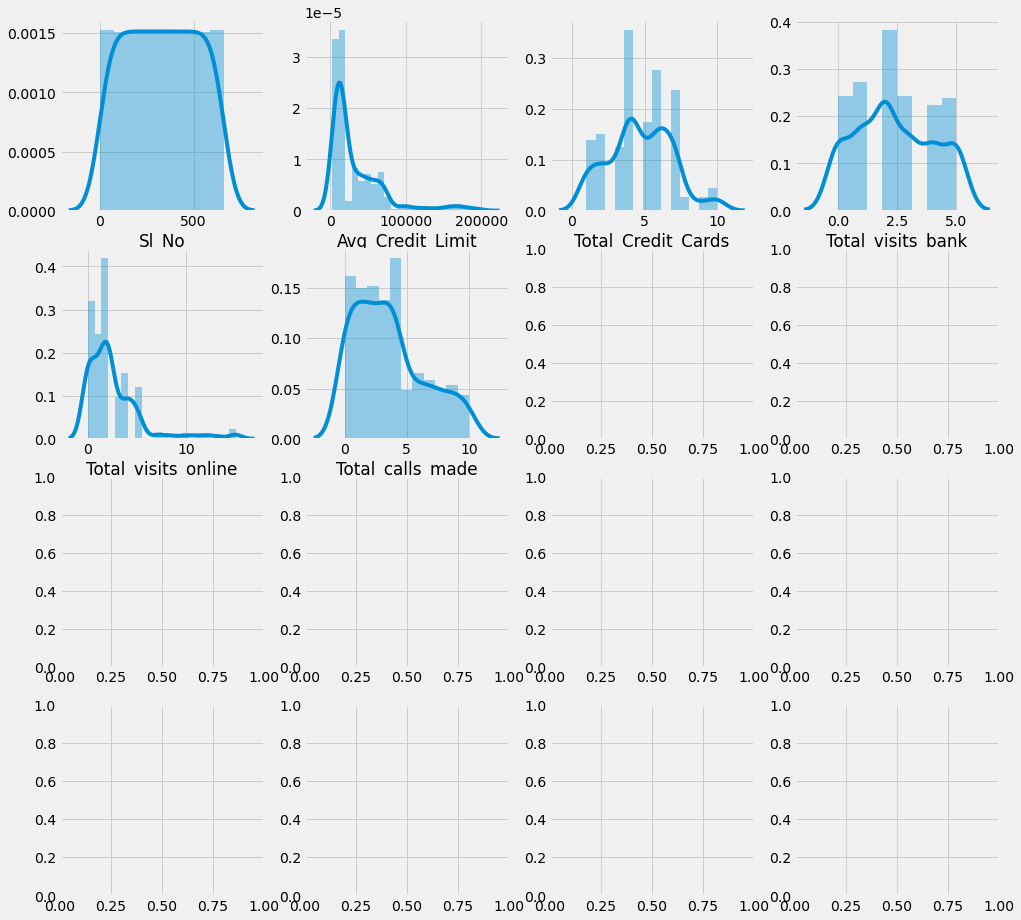

In [19]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))
for i in range(4):
    for j in range(4):
        sns.distplot(df[df.columns[4 * i + j]], ax=axs[i,j])
plt.show()

In [20]:
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters=k, random_state=1)
df['k_5_label'] = kmeans.fit_predict(df)

In [21]:
# The intertia is one measure of understanding the behaviors of clusters.

kmeans.inertia_

30905493940.16211

In [22]:
profile = df.groupby('k_5_label').mean().T

In [23]:
round(profile)

k_5_label,0,1,2,3,4
Sl_No,202.0,637.0,505.0,494.0,549.0
Avg_Credit_Limit,12151.0,169148.0,64677.0,38686.0,109864.0
Total_Credit_Cards,4.0,9.0,6.0,6.0,8.0
Total_visits_bank,2.0,1.0,3.0,4.0,1.0
Total_visits_online,2.0,11.0,1.0,1.0,10.0
Total_calls_made,5.0,1.0,2.0,2.0,1.0


In [24]:
# round(profile.apply(lambda x: (max(x) - min(x))/x.median(), axis=1))

round(pd.DataFrame(kmeans.cluster_centers_.T))

,0,1,2,3,4
0,202.0,637.0,505.0,494.0,549.0
1,12151.0,169148.0,64677.0,38686.0,109864.0
2,4.0,9.0,6.0,6.0,8.0
3,2.0,1.0,3.0,4.0,1.0
4,2.0,11.0,1.0,1.0,10.0
5,5.0,1.0,2.0,2.0,1.0


In [25]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=1)
df['k_5_batch'] = minibatch_kmeans.fit_predict(df)

In [26]:
pd.crosstab(df['k_5_label'], df['k_5_batch'])

k_5_batch,0,1,2,3,4
k_5_label,,,,,
0,391,0,0,0,0
1,0,27,0,0,0
2,0,0,93,6,0
3,5,0,0,116,0
4,0,0,0,0,22


In [27]:
from sklearn.metrics import silhouette_score

In [28]:
def evaluate_metrics(df, min_clust=2, max_clust=10, rand_state=1):
    inertias = []
    silhouette = []
    for n_clust in range(min_clust, max_clust):
        kmeans = KMeans(n_clusters=n_clust, random_state=rand_state)
        y_label = kmeans.fit_predict(df)
        inertias.append(kmeans.inertia_)
        silhouette.append(silhouette_score(df, y_label))
        
    fig, ax = plt.subplots(2, 2, figsize=(15, 10))
    ax[0][0].plot(range(min_clust, max_clust), inertias, '-x', linewidth=2)
    ax[0][0].set_xlabel('No. of clusters')
    ax[0][0].set_ylabel('Inertia')
    
    ax[0][1].plot(range(min_clust, max_clust), silhouette, '-x', linewidth=2)
    ax[0][1].set_xlabel('No. of clusters')
    ax[0][1].set_ylabel('Silhouette Score')
    
    fig.suptitle('Metrics to evaluate the number of clusters')
    plt.show()

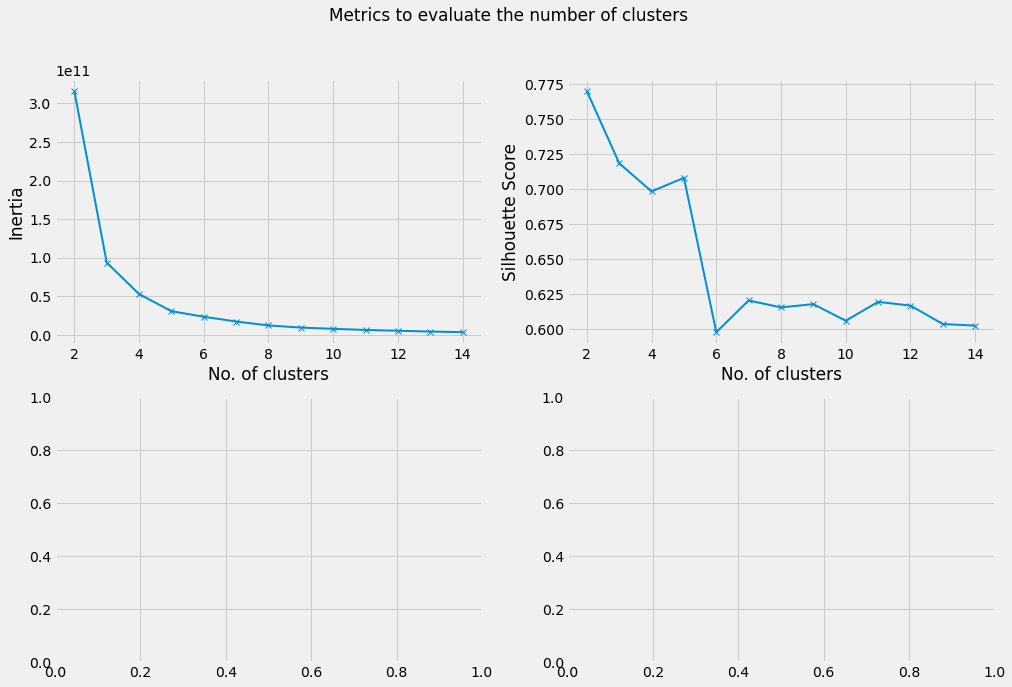

In [29]:
evaluate_metrics(df.iloc[:, :-2], min_clust=2, max_clust=15, rand_state=0)

In [30]:
# scaling 

df2 = df.copy()
df.fillna(df.median(), inplace=True)

In [31]:
from sklearn.preprocessing import StandardScaler
df_scaled = StandardScaler().fit_transform(df2)

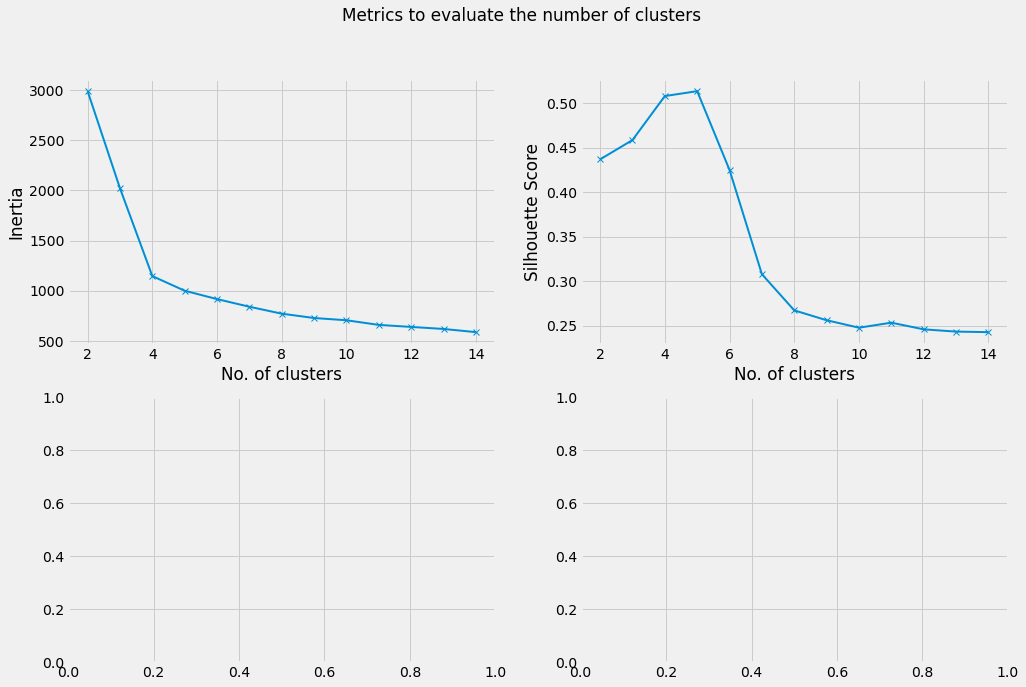

In [32]:
evaluate_metrics(df_scaled, min_clust=2, max_clust=15, rand_state=0)

In [33]:
kmeans = MiniBatchKMeans(n_clusters=8, random_state=1)
df2['k_8_label'] = kmeans.fit_predict(df2)

In [34]:
round(1e2 * df2['k_8_label'].value_counts().sort_index()/len(df2), 2)

0    27.73
1     3.48
2    11.06
3     9.39
4     2.58
5    31.52
6    12.58
7     1.67
Name: k_8_label, dtype: float64

In [35]:
round(df2.groupby('k_8_label').mean().T, 2)

k_8_label,0,1,2,3,4,5,6,7
Sl_No,202.33,635.91,499.75,473.02,526.12,201.99,514.66,635.91
Avg_Credit_Limit,16486.34,173000.00,67328.77,50612.90,99352.94,8336.54,34493.98,134909.09
Total_Credit_Cards,3.77,8.61,5.55,5.48,8.47,3.68,5.63,8.82
Total_visits_bank,1.99,0.57,3.29,3.23,0.65,2.16,3.63,0.64
Total_visits_online,2.43,11.09,0.90,1.02,9.82,2.44,1.11,11.27
Total_calls_made,4.64,0.91,2.10,2.13,1.18,4.83,2.07,1.18
k_5_label,0.00,1.00,2.00,2.61,3.76,0.00,3.00,2.91
k_5_batch,0.00,1.00,2.00,2.71,3.76,0.00,2.82,2.91


In [36]:
from scipy.stats import zscore
df2_z = df2.apply(zscore)

In [39]:
df2_z.head()

,Sl_No,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,k_5_label,k_5_batch,k_8_label
Customer Key,,,,,,,,,
87073,-1.729428,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,2.233457,2.240526,0.391696
38414,-1.724180,0.410293,-0.787585,-1.473731,2.520519,1.891859,1.482906,1.491034,-0.037738
17341,-1.718931,0.410293,1.058973,-0.860451,0.134290,0.145528,1.482906,1.491034,-0.037738
40496,-1.713683,-0.121665,0.135694,-0.860451,-0.547490,0.145528,1.482906,1.491034,1.250566
47437,-1.708434,1.740187,0.597334,-1.473731,3.202298,-0.203739,2.233457,2.240526,0.391696


In [40]:
from sklearn.preprocessing import StandardScaler
import numpy as np
sc = StandardScaler()
X_std = pd.DataFrame(sc.fit_transform(df2),columns=df2.columns)

In [41]:
X_std.head()

,Sl_No,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,k_5_label,k_5_batch,k_8_label
0,-1.729428,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,2.233457,2.240526,0.391696
1,-1.724180,0.410293,-0.787585,-1.473731,2.520519,1.891859,1.482906,1.491034,-0.037738
2,-1.718931,0.410293,1.058973,-0.860451,0.134290,0.145528,1.482906,1.491034,-0.037738
3,-1.713683,-0.121665,0.135694,-0.860451,-0.547490,0.145528,1.482906,1.491034,1.250566
4,-1.708434,1.740187,0.597334,-1.473731,3.202298,-0.203739,2.233457,2.240526,0.391696


In [43]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X_std, 'ward', metric='euclidean')
Z.shape

(659, 4)

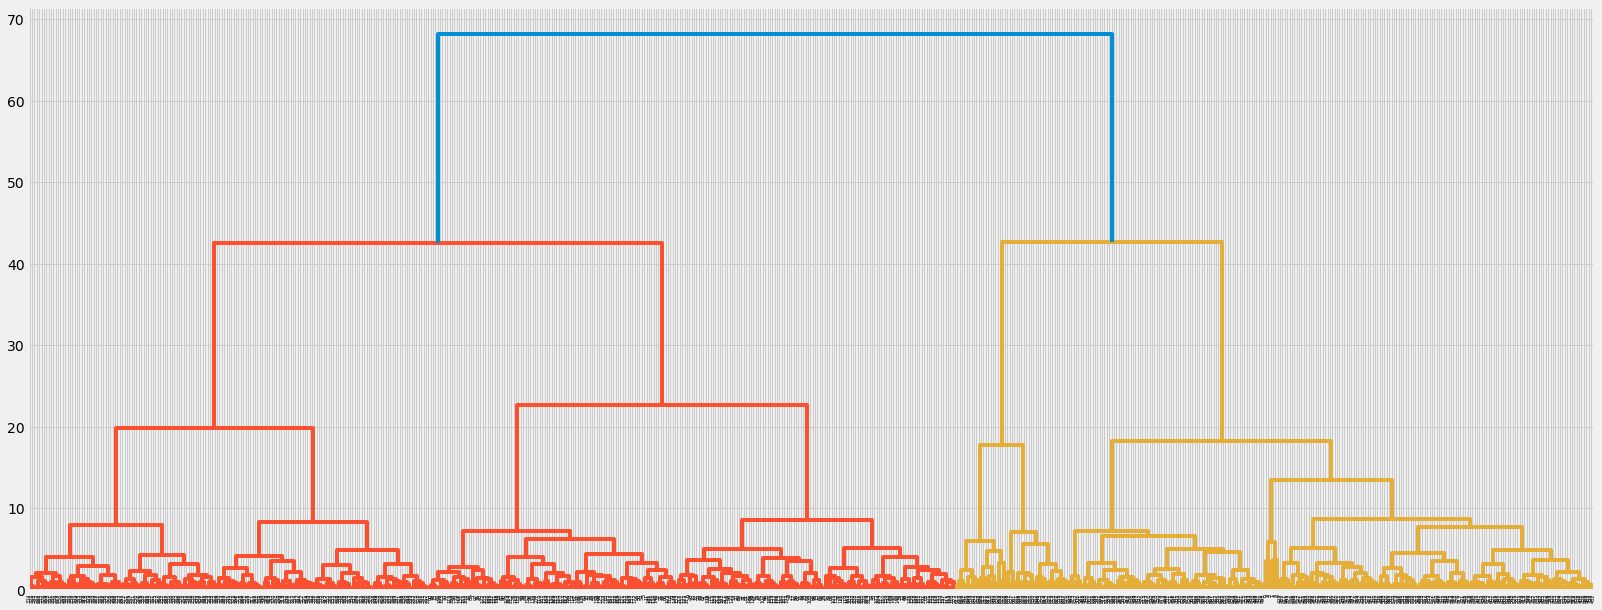

In [44]:
plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.show()

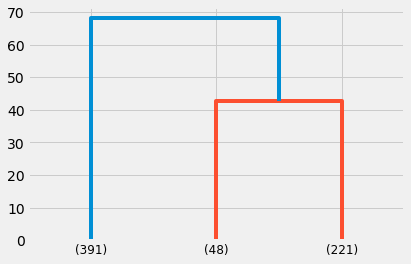

In [45]:
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

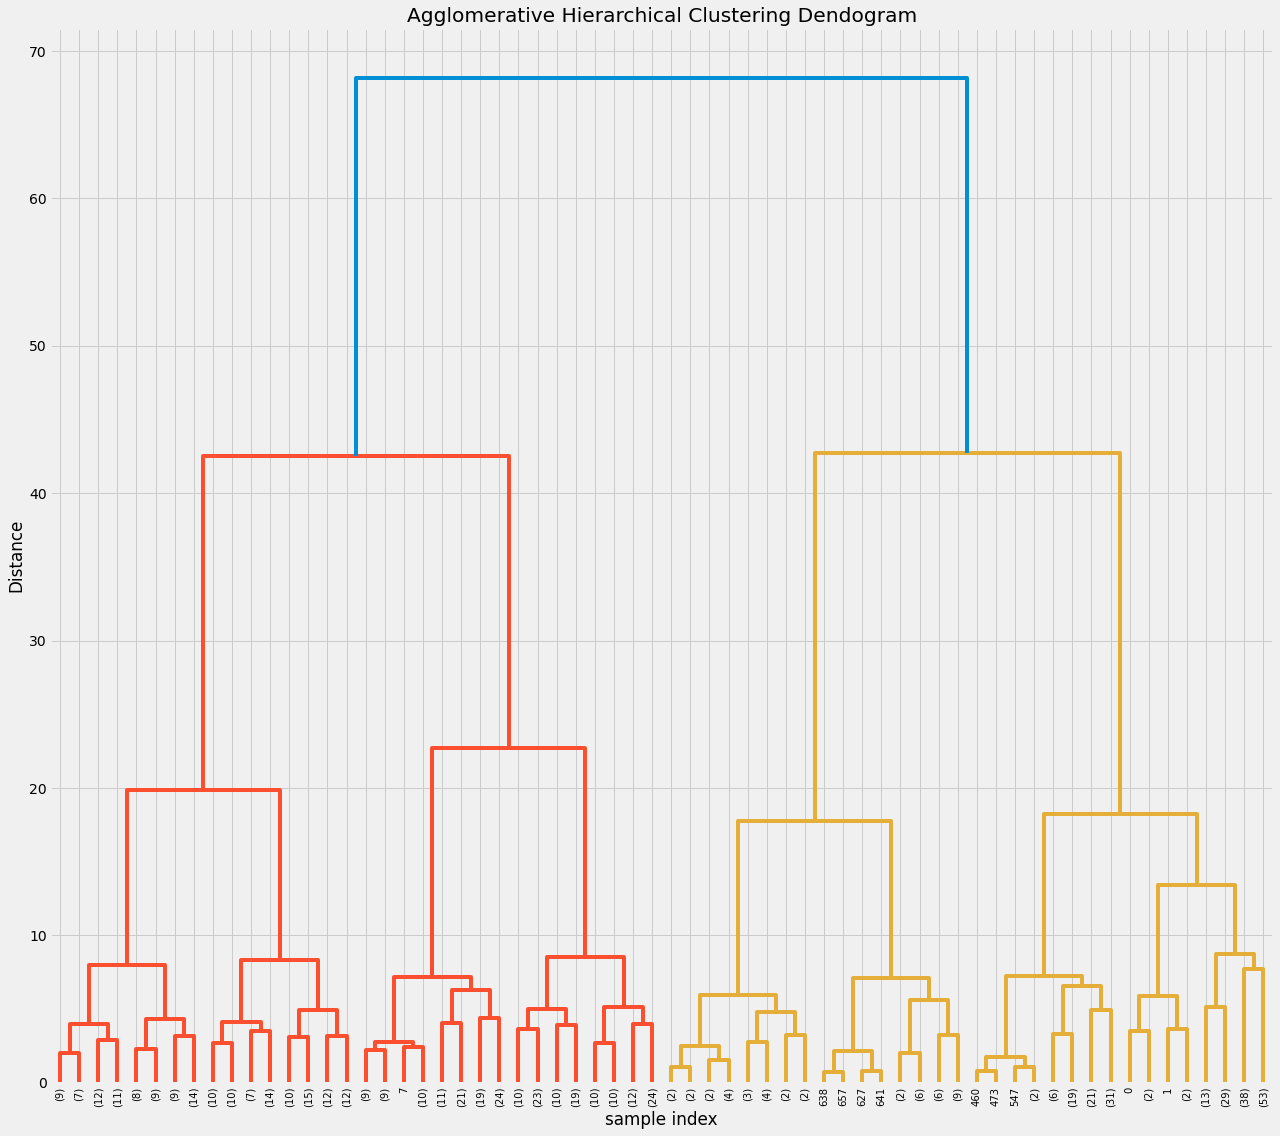

In [47]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(X_std, 'ward')
dendrogram(Z,leaf_rotation=90.0,p=5,color_threshold=52,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

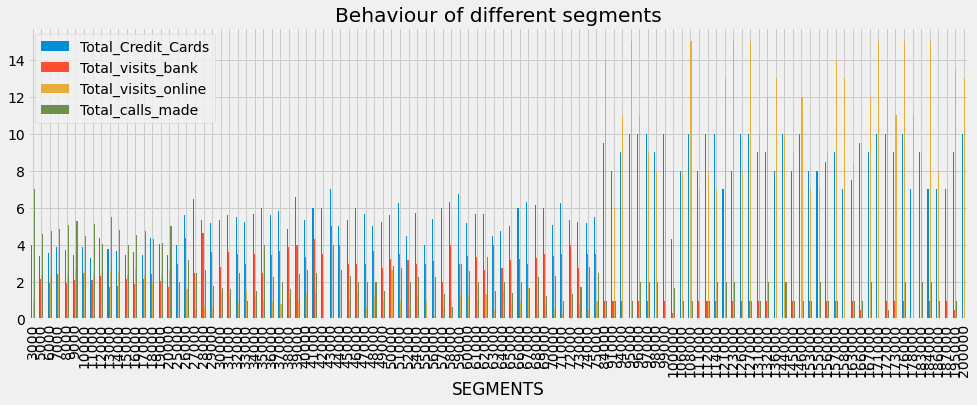

In [42]:
(df[['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online','Total_calls_made']]
 .groupby('Avg_Credit_Limit').mean().plot.bar(figsize=(15, 5)))
plt.title('Behaviour of different segments')
plt.xlabel('SEGMENTS');

In [38]:
# cluster analysis above

# Key Questions

#  The Different segments of customers are:
#    1. low balance and average activity - good for spend campaign targetting
#    2. moderate balances and purchase activities - higher one-off purchase behavior
#    3. highest activity, balances and purchases - increasing credit limit increases purchase activities

